In [1]:
!pip install caer canaro

     |████████████████████████████████| 839kB 12.2MB/s 
     |████████████████████████████████| 21.6MB 4.1MB/s 
     |████████████████████████████████| 747kB 44.5MB/s 


In [3]:
! pip install caer

     |████████████████████████████████| 839kB 6.6MB/s 
     |████████████████████████████████| 21.6MB 1.8MB/s 
     |████████████████████████████████| 747kB 53.2MB/s 


In [5]:
! pip install canaro

In [12]:
!pip install kaggle

In [13]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"labidimontassar","key":"61e3c4f863881cd46acb3dc350f562f3"}'}

In [14]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# change permission 
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 99% 1.07G/1.08G [00:09<00:00, 146MB/s]
100% 1.08G/1.08G [00:09<00:00, 126MB/s]


In [17]:
from zipfile import ZipFile
file_name = "the-simpsons-characters-dataset.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Done')

Done


In [6]:
import os 
import cv2 as cv 
import numpy as np 
import gc 
import caer
import canaro


In [18]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/content/simpsons_dataset'


In [23]:
# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [25]:

#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters   

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [26]:

# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
966 - marge_simpson
967 - marge_simpson
968 - marge_simpson
969 - marge_simpson
970 - marge_simpson
971 - marge_simpson
972 - marge_simpson
973 - marge_simpson
974 - marge_simpson
975 - marge_simpson
976 - marge_simpson
977 - marge_simpson
978 - marge_simpson
979 - marge_simpson
980 - marge_simpson
981 - marge_simpson
982 - marge_simpson
983 - marge_simpson
984 - marge_simpson
985 - marge_simpson
986 - marge_simpson
987 - marge_simpson
988 - marge_simpson
989 - marge_simpson
990 - marge_simpson
991 - marge_simpson
992 - marge_simpson
993 - marge_simpson
994 - marge_simpson
995 - marge_simpson
996 - marge_simpson
997 - marge_simpson
998 - marge_simpson
999 - marge_simpson
1000 - marge_simpson
1001 - marge_simpson
1002 - marge_simpson
1003 - marge_simpson
1004 - marge_simpson
1005 - marge_simpson
1006 - marge_simpson
1007 - marge_simpson
1008 - marge_simpson
1009 - marge_simpson
1010 - marge_simpson
1011 - marg

/usr/local/lib/python3.7/dist-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [28]:
len(train)

13811

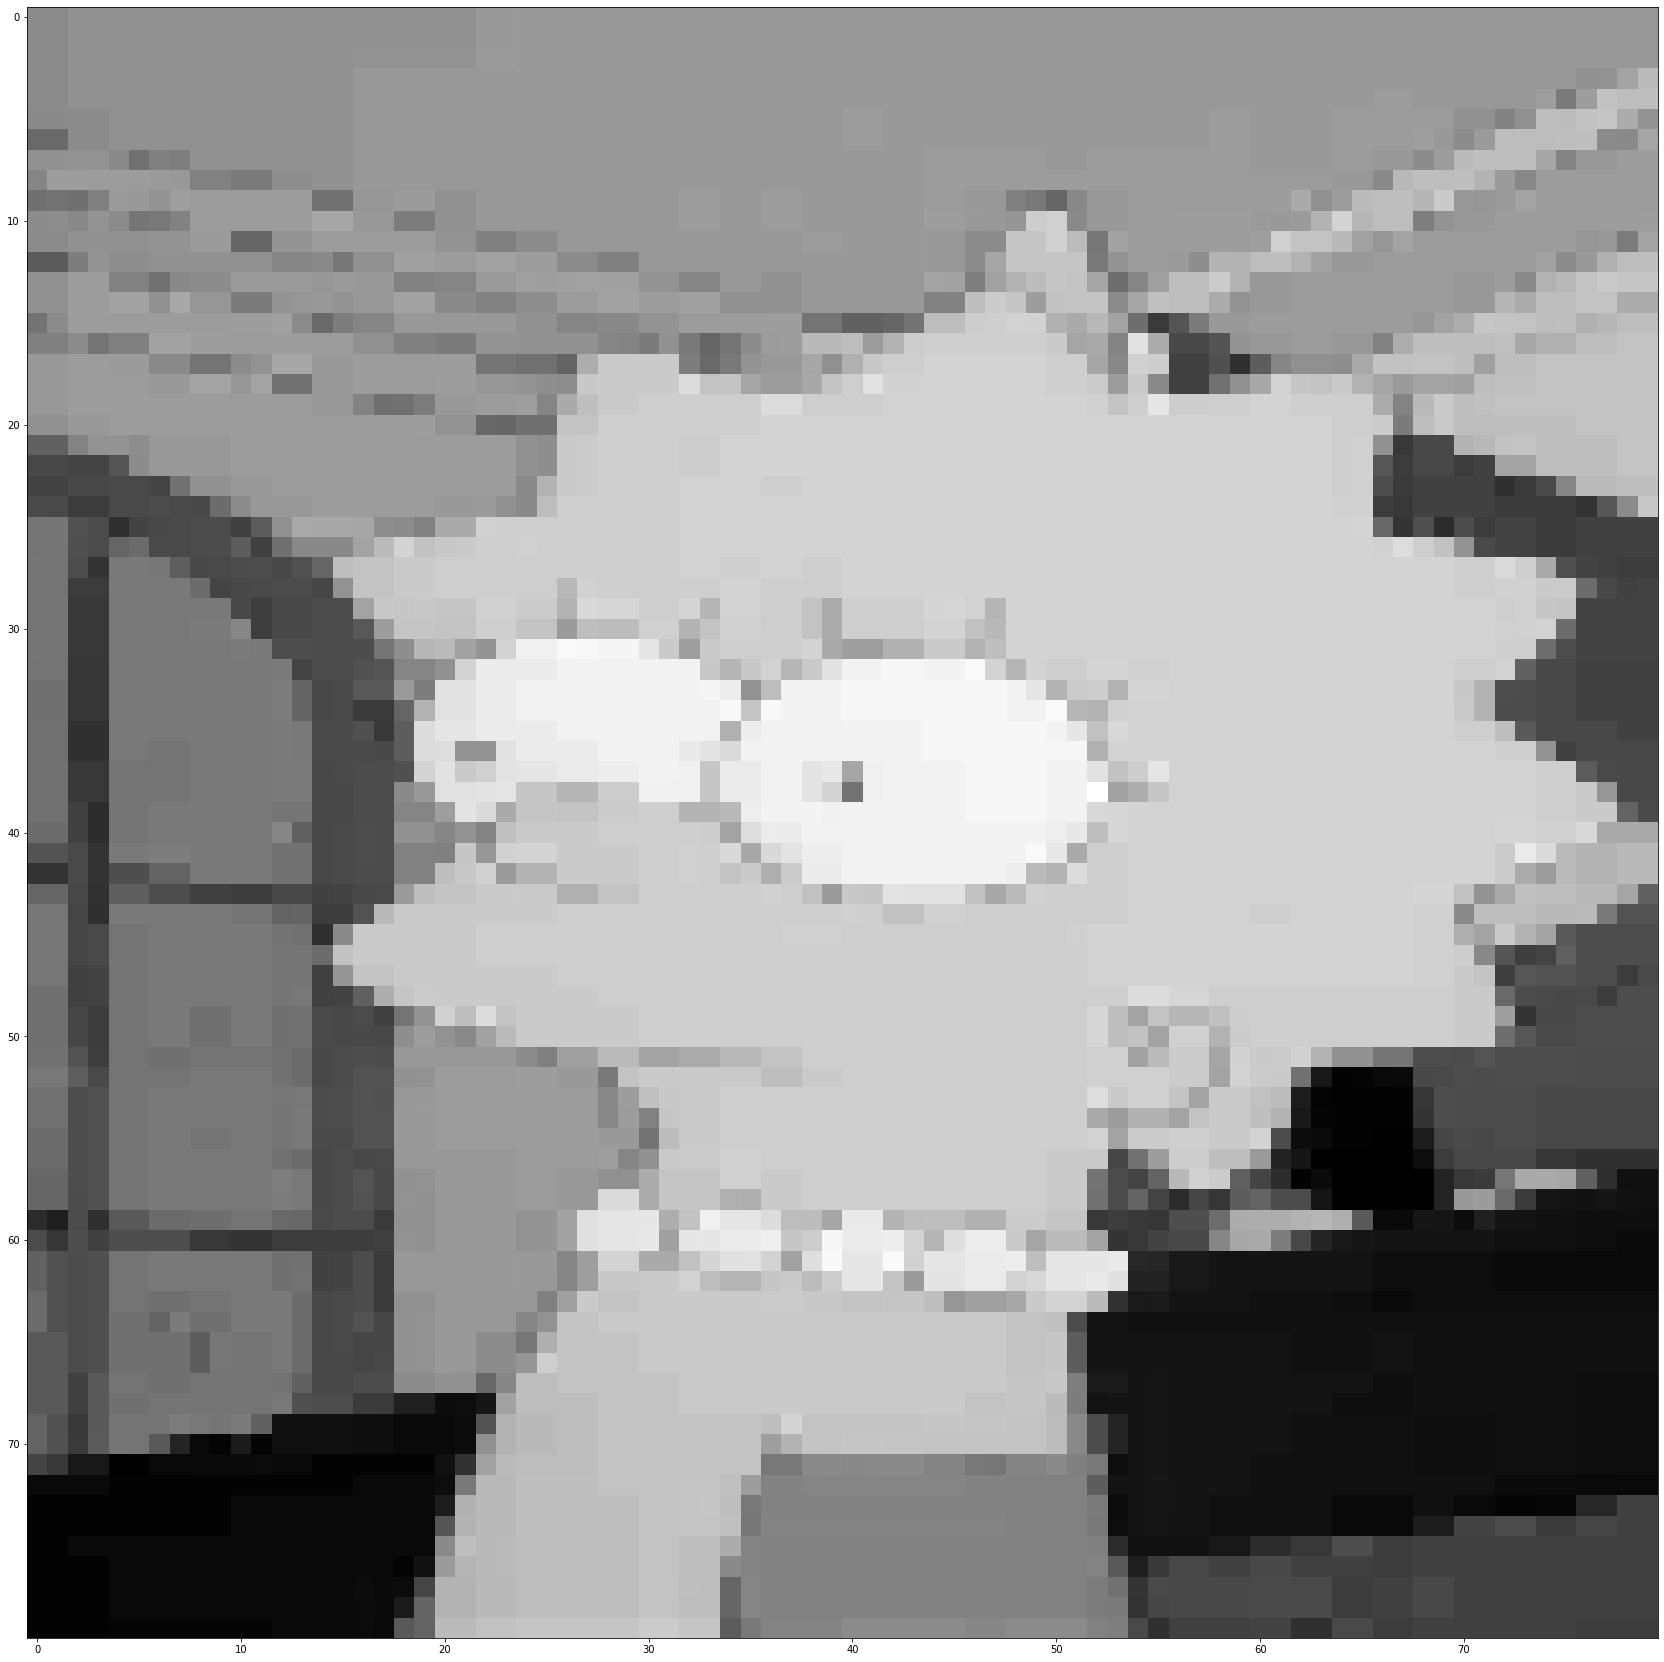

In [29]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(30,30))
plt.imshow(train[0,0], cmap='gray')
plt.show()


In [30]:
featureSet , labels = caer.sep_train(train,IMG_SIZE=IMG_SIZE)

In [32]:
from tensorflow.keras.utils import to_categorical
# Normalize the featureSet 
featureSet = caer.normalize(featureSet)
labels= to_categorical(labels,len(characters))


In [34]:
x_train , x_val , y_train, y_val = caer.train_val_split(featureSet,labels,val_ratio=0.2)

In [35]:
del train 
del featureSet
del labels
gc.collect()

3289

In [ ]:
BATCH_SIZE = 32 
EPOCHS = 10

In [ ]:
# Image data generator 
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train,y_train,batchsize=BATCH_SIZE)

In [36]:
# Create the model 

model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE,channels=channels,output_dim=len(characters),loss='binary_crossentropy',decay=1e-6,learning_rate=0.001,momentum=0.9,nesterov=True)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       